In [8]:
import os
import sys
_project_dir = os.path.dirname(os.getcwd())
os.environ['PROJECT_DIR'] = _project_dir
sys.path.append(_project_dir)
del _project_dir

from Padd import ObjectAdder
from PIL import Image
import torch
import numpy as np
import os
import json
import random
from PIL import Image
from tqdm import tqdm
from typing import List, Tuple, Dict, Any

from scripts.utils import *

from Padd.GaragePaddPipeline import GarageObjectAdder

from PATHS.PaddGaragePaths import IMAGES_DATASET_PATH

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
seed = 228
np.random.seed(seed)
random.seed(seed)

In [6]:

# scene_directory = 
# scene_files = sorted(os.listdir(scene_directory))
# generated_objects_directory = ""
# print(len(scene_files))

In [ ]:
model = GarageObjectAdder()

In [ ]:
classes = [ class_ for class_ in os.listdir("../data/object_images")]
print(classes)

['potted plant', 'bus', 'horse', 'boat', 'aeroplane', 'sheep', 'cow', 'motorbike', 'bottle', 'chair', 'bird', 'sofa', 'monitor', 'bicycle', 'tv', 'dining table', 'dog', 'train', 'cat', 'car', 'person']


In [ ]:
class_images = []
class_masks = []
for class_ in classes:
    image_path = os.path.join("../data/object_images", class_, "images", "prompt00000", "object_raw_image.jpg")
    mask_path = os.path.join("../data/object_images", class_, "images", "prompt00000", "mask.jpg")
    class_images.append(Image.open(image_path))
    class_masks.append(Image.open(mask_path))

In [ ]:
def base_loop(scene_directory, file, class_images, class_masks, classes, model, save = False ,seed = seed):
    scene = Image.open(os.path.join(scene_directory, file))
    batch = np.random.choice(range(20), size = (4,))
    object_images = [class_images[i] for i in batch]
    object_masks = [class_masks[i] for i in batch]
    prompts = [classes[i] for i in batch]
    new_images, masks, boxes, prompts = model(
        scene_image = scene, 
        object_images=object_images , 
        object_masks= object_masks , 
        prompts=prompts,   
        seed= seed
    )
    if new_images == []:
        return None
    if save:
        for i , new_image in enumerate(new_images):
            new_image.save(f"../data/test/images/{file.split('.')[0]}_sample_{i}.png")
            np.savetxt(f"../data/test/bboxes/{file.split('.')[0]}_sample_{i}.txt", np.array(boxes[i]))
            with open(f"../data/test/classes/{file.split('.')[0]}_sample_{i}.txt", 'w') as f:
                f.write(prompts[i]) 
    return new_images, masks, boxes, prompts

In [ ]:
for file in scene_files[:1]:
    new_images, masks, boxes, prompts = base_loop(
        scene_directory = scene_directory, 
        file = file, 
        class_images = class_images, 
        class_masks = class_masks, 
        classes = classes, 
        model = model
    )
          


In [ ]:
boxes, prompts

([[0, 0, 133, 37], [0, 333, 167, 494], [376, 0, 603, 72]],
 ['sofa', 'monitor', 'potted plant', 'sheep'])

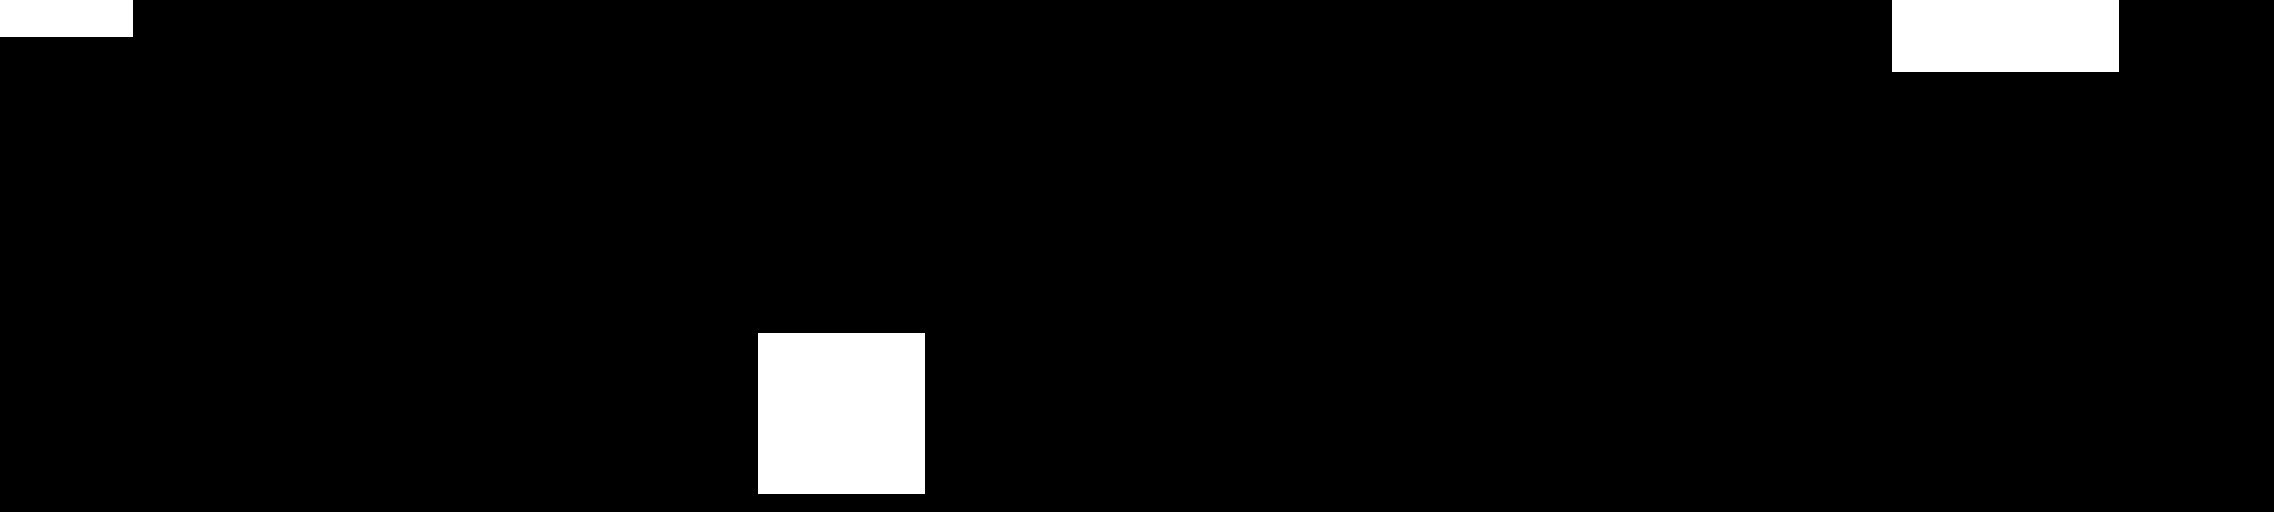

In [ ]:
CombineImagesHorizontally(*masks)

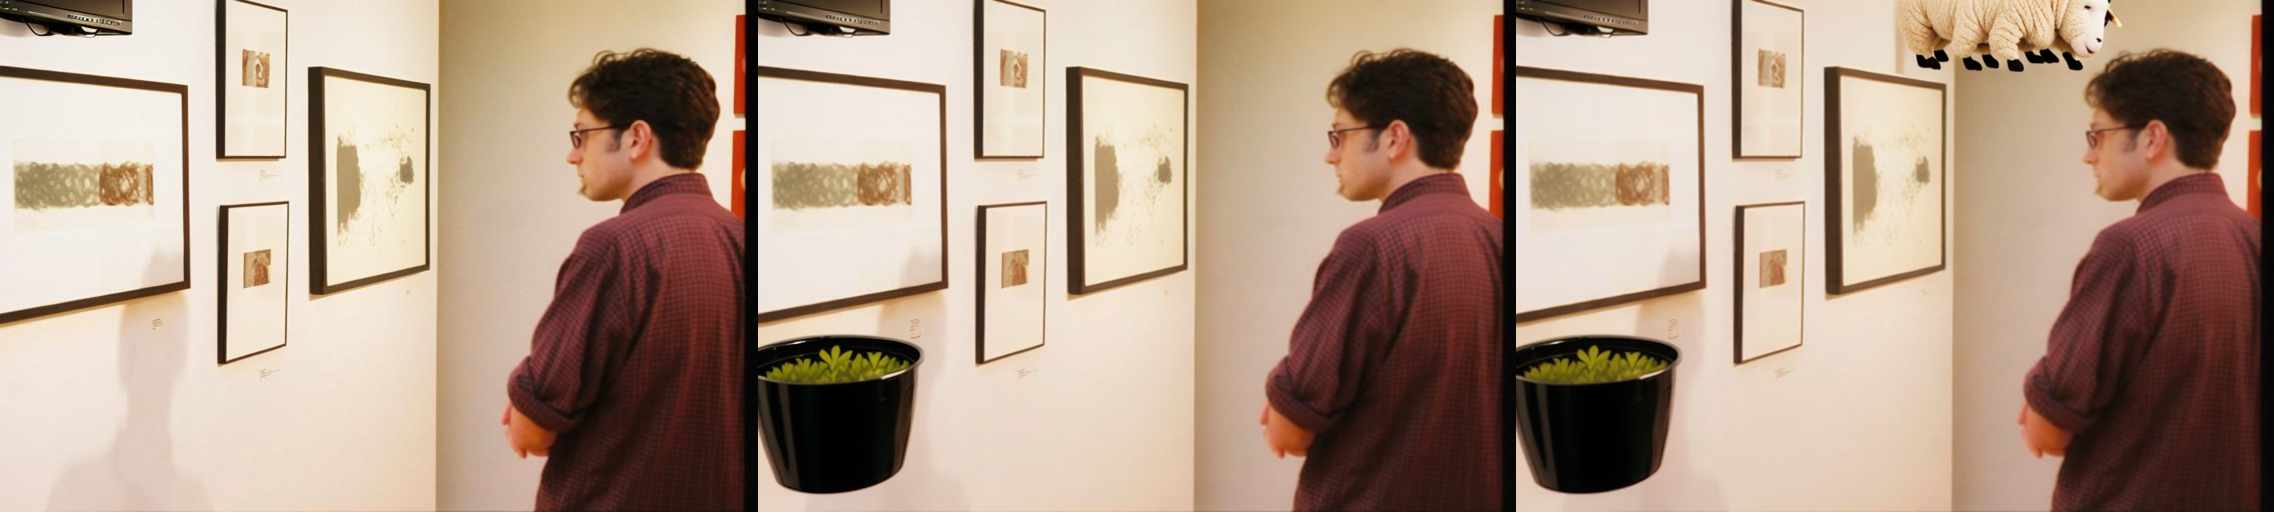

In [ ]:
CombineImagesHorizontally(*new_images)